__Data Science Job Salaries Dataset contains 11 columns, each are:__
1. work_year: The year the salary was paid.
2. experience_level: The experience level in the job during the year
3. employment_type: The type of employment for the role
4. job_title: The role worked in during the year.
5. salary: The total gross salary amount paid.
6. salary_currency: The currency of the salary paid as an ISO 4217 currency code.
7. salaryinusd: The salary in USD
8. employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
9. remote_ratio: The overall amount of work done remotely
10. company_location: The country of the employer's main office or contracting branch
11. company_size: The median number of people that worked for the company during the year

__Goal of the notebook is to:__
- Explore every feature in the dataset;

- Work Year Analysis(with Salary, Remote Ratio);

- Experience Level Analysis (with Employment Type, Top 3 Job Title, Company Size);

- Company Location Analysis (with Experience Level)

- Salary Analysis (with Experience Level, Job Title, Remote Ratio)

In [2]:
#Data
import pandas as pd
import numpy as np
import country_converter as coco


In [3]:
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
#fig = px.colors.sequential.swatches_continuous() ----> Sequential Color template
import plotly.figure_factory as ff
import plotly.graph_objects as go


In [4]:
#Styling
%matplotlib inline
sns.set_theme(style="dark")
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')

In [5]:
df_original = pd.read_csv('ds_salaries.csv')
df = df_original.drop(df_original[['salary','salary_currency','Unnamed: 0']],axis=1, inplace=False)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


# Basic  Ananlysis

In [6]:
import pprint
from dataclasses import asdict

kList = []
columns = ['work_year','experience_level','employment_type', 'employee_residence','company_location','company_size']

for x in columns:
    values = df[x].value_counts()
    kList.append(values)
pprint.pprint(kList)


[2022    318
2021    217
2020     72
Name: work_year, dtype: int64,
 SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64,
 FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64,
 US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: employee_residence, dtype: int64,
 US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE 

In [7]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,IN,100,US,L


In [8]:
cat_columns = df.select_dtypes(include=['object']).columns.tolist()
num_columns = df.select_dtypes(exclude=['object']).columns.tolist()
print("Categorical Columns: ",cat_columns)
print("Numerical Columns: ",num_columns)


Categorical Columns:  ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']
Numerical Columns:  ['work_year', 'salary_in_usd', 'remote_ratio']


In [62]:
import pandas_profiling as pp
pp.ProfileReport(df)

Render HTML: 100%|██████████| 1/1 [00:15<00:00, 15.60s/it]


# Missing Value Check

In [9]:
missing_val = df.isnull().sum()
missing_val

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

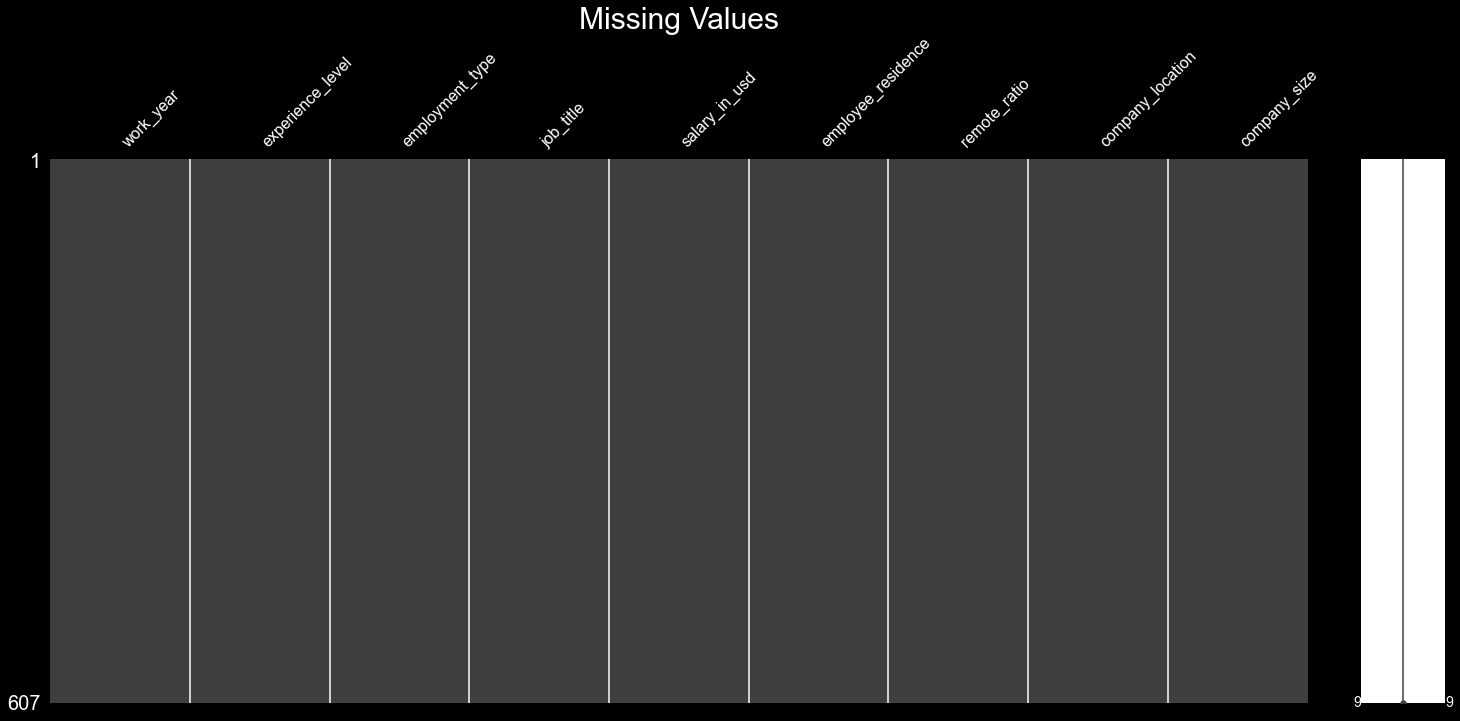

Note ----> No Missing Values Observed


In [10]:
msno.matrix(df)
plt.title('Missing Values',fontsize=30)
plt.show()
print("Note ----> No Missing Values Observed")

# Analysis on categorical columns & Analysis on numeric columns.
- Categorical Columns:  
experience_level, employment_type, job_title, employee_residence, company_location, company_size
- Numerical Columns:  
work_year, salary_in_usd, remote_ratio

## Analysis on categorical columns

In [11]:
# Experience Level
dictAbbreviations = {
    'EN':'Entry-level/Junior',
    'MI':'Mid-level/Intermediate',
    'SE':'Senior-level/Expert',
    'EX':'Executive-level/Director'
}
for word, replacement in dictAbbreviations.items():
    df['experience_level'] = df['experience_level'].replace(word, replacement)

In [12]:
df['experience_level']

0      Mid-level/Intermediate
1         Senior-level/Expert
2         Senior-level/Expert
3      Mid-level/Intermediate
4         Senior-level/Expert
                ...          
602       Senior-level/Expert
603       Senior-level/Expert
604       Senior-level/Expert
605       Senior-level/Expert
606    Mid-level/Intermediate
Name: experience_level, Length: 607, dtype: object

In [13]:
test = df['experience_level'].value_counts()
p = np.round((100*test.values / sum(test.values)).tolist(),2)
print(p.tolist())
print(type(p.tolist()))

[46.13, 35.09, 14.5, 4.28]
<class 'list'>


In [14]:
#Tree Map plotting using Plotly
exCounts = df['experience_level'].value_counts()
fig = px.treemap(exCounts,path=[exCounts.index],values=exCounts.values, title = ' Treemap on Experience Level',
                    color=exCounts.index, color_continuous_scale='RdBu',width=1000, height=500)
percents = np.round((100*exCounts.values / sum(exCounts.values)).tolist(),2)
print(percents)
fig.data[0].customdata = percents.tolist()
fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata}%'
fig.show()


[46.13 35.09 14.5   4.28]


In [15]:
df['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [16]:
# Experience Level
dictAbbreviations2 = {
    'FT':'Full-Time',
    'CT':'Contract',
    'PT':'Part-Time',
    'FL':'Freelance'
}
for word, replacement in dictAbbreviations2.items():
    df['employment_type'] = df['employment_type'].replace(word, replacement)

df['employment_type'].unique()

array(['Full-Time', 'Contract', 'Part-Time', 'Freelance'], dtype=object)

In [17]:
# print(df['employment_type'].value_counts().index)
# print(df['employment_type'].value_counts().values)
wyCounts = df['work_year'].value_counts()
wyCounts

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

In [18]:
etypeCounts = df['employment_type'].value_counts()
fig = px.bar(x=etypeCounts.index, y=etypeCounts.values, color=etypeCounts.index, text=etypeCounts.values, title="Employment Type ")
fig.show()

In [19]:
#Employment Residence and Company Locations
cc = coco.convert(names=df['employee_residence'], to="ISO3")
df['employee_residence'] = cc
rCounts = df['employee_residence'].value_counts()
fig = px.choropleth(locations=rCounts.index,
                    color=rCounts.values,
                    color_continuous_scale=px.colors.sequential.Peach,
                    title = 'Employee Loaction Distribution Map',
                    labels={'color':'Employee Count'})
fig.show()

In [20]:
topemplocation = rCounts[:10]
fig = px.bar(y=topemplocation.values, 
             x=topemplocation.index, 
             color = topemplocation.index,
             color_discrete_sequence=px.colors.sequential.Viridis,
             text=topemplocation.values,
             title= 'Top 10 Location of Employee')

fig.show()

In [21]:
cl = coco.convert(names=df['company_location'], to="ISO3")
df['company_location'] = cl
cLoc = df['company_location'].value_counts()

In [22]:
topcLoc = cLoc[:10]
fig = go.Figure(data=[
    go.Bar(name='Employee Loaction', 
           x=topemplocation.index, y=topemplocation.values,
           text=topemplocation.values,marker_color='blue'),
    go.Bar(name='Company Location', x=topcLoc.index, 
           y=topcLoc.values,text=topcLoc.values,marker_color='black')
])
fig.update_layout(barmode='group',title='Comparison of Employee Location and Company Location')

fig.show()

In [23]:
#Company Size
grouped_size = df['company_size'].value_counts()

fig = px.bar(y=grouped_size.values, 
             x=grouped_size.index, 
             color = grouped_size.index,
             text=grouped_size.values,
             title= 'Distribution of Company Size')

fig.show()


In [24]:
exlevel_size = df.groupby(['experience_level','company_size']).size()
fig = go.Figure(data=[
    go.Bar(name='Entry-level/Junior', x=exlevel_size['Entry-level/Junior'].index, y=exlevel_size['Entry-level/Junior'].values,
           text=exlevel_size['Entry-level/Junior'].values, marker_color='white'),
    go.Bar(name='Executive-level/Director', x=exlevel_size['Executive-level/Director'].index, y=exlevel_size['Executive-level/Director'].values,
           text=exlevel_size['Executive-level/Director'].values, marker_color='red'),
    go.Bar(name='Mid-level/Intermediate', x=exlevel_size['Mid-level/Intermediate'].index, y=exlevel_size['Mid-level/Intermediate'].values,
           text=exlevel_size['Mid-level/Intermediate'].values, marker_color='skyblue'),
    go.Bar(name='Senior-level/Expert', x=exlevel_size['Senior-level/Expert'].index, y=exlevel_size['Senior-level/Expert'].values,
           text=exlevel_size['Senior-level/Expert'].values, marker_color='blue'),
])
fig.update_layout(xaxis_tickangle=-45, title='Experience Level with Company Size', template='plotly_dark')

fig.show()

In [25]:
exlevel_size = df.groupby(['experience_level','work_year']).size()
fig = go.Figure(data=[
    go.Bar(name='Entry-level/Junior', x=exlevel_size['Entry-level/Junior'].index, y=exlevel_size['Entry-level/Junior'].values,
           text=exlevel_size['Entry-level/Junior'].values, marker_color='green'),
    go.Bar(name='Executive-level/Director', x=exlevel_size['Executive-level/Director'].index, y=exlevel_size['Executive-level/Director'].values,
           text=exlevel_size['Executive-level/Director'].values, marker_color='red'),
    go.Bar(name='Mid-level/Intermediate', x=exlevel_size['Mid-level/Intermediate'].index, y=exlevel_size['Mid-level/Intermediate'].values,
           text=exlevel_size['Mid-level/Intermediate'].values, marker_color='cyan'),
    go.Bar(name='Senior-level/Expert', x=exlevel_size['Senior-level/Expert'].index, y=exlevel_size['Senior-level/Expert'].values,
           text=exlevel_size['Senior-level/Expert'].values, marker_color='blue'),
])
fig.update_layout(xaxis_tickangle=-45, title='Experience Level with Work Year')

fig.show()

In [26]:
#top 10 jobs
top10_job_title = df['job_title'].value_counts()[:10]
fig = px.bar(y=top10_job_title.values, 
             x=top10_job_title.index, 
             color = top10_job_title.index,
             color_discrete_sequence=px.colors.sequential.Plasma,
             text=top10_job_title.values,
             title= 'Top 10 Job Titles')

fig.show()

In [27]:
exlevel_job = df.groupby(['experience_level','job_title']).size()

entry_top3 = exlevel_job['Entry-level/Junior'].sort_values(ascending=False)[:3]
executive_top3 = exlevel_job['Executive-level/Director'].sort_values(ascending=False)[:3]
mid_top3 = exlevel_job['Mid-level/Intermediate'].sort_values(ascending=False)[:3]
senior_top3 = exlevel_job['Senior-level/Expert'].sort_values(ascending=False)[:3]

exlevel_type = df.groupby(['experience_level','employment_type']).size()
fig = go.Figure(data=[
    go.Bar(name='Entry-level/Junior', x=entry_top3.index, y=entry_top3.values,
           text=entry_top3.values, marker_color='Grey'),
    go.Bar(name='Executive-level/Director', x=executive_top3.index, y=executive_top3.values,
           text=executive_top3.values, marker_color='red'),
    go.Bar(name='Mid-level/Intermediate', x=mid_top3.index, y=mid_top3.values,
           text=mid_top3.values, marker_color='cyan'),
    go.Bar(name='Senior-level/Expert', x=senior_top3.index, y=senior_top3.values,
           text=senior_top3.values, marker_color='magenta'),
])
fig.update_layout(barmode = 'stack', xaxis_tickangle=-45, title='Experiece Level with top 3 job title')

fig.show()

### Here  there is a flaw...Head of Data Science and director of Data Science are almost the same poitions. These Job Titles can be generalized

In [28]:
#Clean Career Values

#ML Engineer -> Machine Learning Engineer
mask = df['job_title'] == 'ML Engineer'
df.loc[mask, 'job_title_clean'] = 'Machine Learning Engineer'

mask = df['job_title'] == 'NLP Engineer'
df.loc[mask, 'job_title_clean'] = 'Machine Learning Engineer'

mask = df['job_title'] == 'Machine Learning Developer'
df.loc[mask, 'job_title_clean'] = 'Machine Learning Engineer'

mask = df.job_title.str.contains('Machine Learning')
df.loc[mask, 'job_title_clean'] = 'Machine Learning Engineer'

mask = df.job_title.str.contains('Machine Learning Scientist')
df.loc[mask, 'job_title_clean'] = 'Machine Learning Engineer'

#Data Scientist
mask = df.job_title.str.contains('Data Scientist')
df.loc[mask, 'job_title_clean'] = 'Data Scientist'

#Data Analyst
mask = df.job_title.str.contains('Data Analyst')
df.loc[mask, 'job_title_clean'] = 'Data Analyst'

#Data Engineer
mask = df.job_title.str.contains('Data Engineer')
df.loc[mask, 'job_title_clean'] = 'Data Engineer'

#Manager
mask = df.job_title.str.contains('Manager')
df.loc[mask, 'job_title_clean'] = 'Manager'

mask = df.job_title.str.contains('Lead')
df.loc[mask, 'job_title_clean'] = 'Manager'

mask = df.job_title.str.contains('Director')
df.loc[mask, 'job_title_clean'] = 'Manager'

mask = df.job_title.str.contains('Head')
df.loc[mask, 'job_title_clean'] = 'Manager'



df.job_title_clean.value_counts()

Data Scientist               156
Data Engineer                145
Data Analyst                 116
Machine Learning Engineer     66
Manager                       58
Name: job_title_clean, dtype: int64

In [29]:
exlevel_job = df.groupby(['experience_level','job_title_clean']).size()

entry_top3 = exlevel_job['Entry-level/Junior'].sort_values(ascending=False)[:3]
executive_top3 = exlevel_job['Executive-level/Director'].sort_values(ascending=False)[:3]
mid_top3 = exlevel_job['Mid-level/Intermediate'].sort_values(ascending=False)[:3]
senior_top3 = exlevel_job['Senior-level/Expert'].sort_values(ascending=False)[:3]

exlevel_type = df.groupby(['experience_level','employment_type']).size()
fig = go.Figure(data=[
    go.Bar(name='Entry-level/Junior', x=entry_top3.index, y=entry_top3.values,
           text=entry_top3.values, marker_color='Grey'),
    go.Bar(name='Executive-level/Director', x=executive_top3.index, y=executive_top3.values,
           text=executive_top3.values, marker_color='red'),
    go.Bar(name='Mid-level/Intermediate', x=mid_top3.index, y=mid_top3.values,
           text=mid_top3.values, marker_color='cyan'),
    go.Bar(name='Senior-level/Expert', x=senior_top3.index, y=senior_top3.values,
           text=senior_top3.values, marker_color='magenta'),
])
fig.update_layout(barmode = 'stack', xaxis_tickangle=-45, title='Experiece Level with top 3 job title')

fig.show()

In [30]:
top10_job_title = df['job_title_clean'].value_counts()
fig = px.bar(y=top10_job_title.values, 
             x=top10_job_title.index, 
             color = top10_job_title.index,
             color_discrete_sequence=px.colors.sequential.Plasma,
             text=top10_job_title.values,
             title= 'Job Titles')

fig.show()

In [31]:
df['company_size'] = df['company_size'].map({'M': 'Medium', 'L': 'Large', 'S':'Small'})
exlevel_size = df.groupby(['experience_level','company_size']).size()
fig = go.Figure(data=[
    go.Bar(name='Entry-level/Junior', x=exlevel_size['Entry-level/Junior'].index, y=exlevel_size['Entry-level/Junior'].values,
           text=exlevel_size['Entry-level/Junior'].values, marker_color='white'),
    go.Bar(name='Executive-level/Director', x=exlevel_size['Executive-level/Director'].index, y=exlevel_size['Executive-level/Director'].values,
           text=exlevel_size['Executive-level/Director'].values, marker_color='red'),
    go.Bar(name='Mid-level/Intermediate', x=exlevel_size['Mid-level/Intermediate'].index, y=exlevel_size['Mid-level/Intermediate'].values,
           text=exlevel_size['Mid-level/Intermediate'].values, marker_color='skyblue'),
    go.Bar(name='Senior-level/Expert', x=exlevel_size['Senior-level/Expert'].index, y=exlevel_size['Senior-level/Expert'].values,
           text=exlevel_size['Senior-level/Expert'].values, marker_color='blue'),
])
fig.update_layout(xaxis_tickangle=-45, title='Experience Level with Company Size', template='plotly_dark')

In [32]:
# Boxplot for salaries according to experience level
fig = px.box(df,x = 'salary_in_usd',color = 'experience_level',y = 'experience_level',template='seaborn',
            title = 'Yearly salaries in USD per experience level')
fig.show()

In [33]:
# Where are located the employees with the highest earnings?
avg_earnings_per_country = pd.DataFrame(df.groupby('employee_residence')[['employee_residence','salary_in_usd']].mean().sort_values('salary_in_usd', ascending=False).round(2))
fig = px.bar(avg_earnings_per_country, x = avg_earnings_per_country.index, y = 'salary_in_usd',
            title = 'Average earnings according to employee residence', template = 'seaborn', color = avg_earnings_per_country.index, text = 'salary_in_usd')
fig.show()

Remote Ratio consists of 3 values: 100, 50, 0.
possible values are as follows:
- 0 No remote work (less than 20%)
- 50 Partially remote
- 100 Fully remote(more than 80%)

In [34]:
plt.figure(figsize=(20,5))
fig = px.bar(x = df['remote_ratio'].value_counts().index.astype(str), 
       y = df['remote_ratio'].value_counts().values,
       color = df['remote_ratio'].value_counts().index.astype(str),
       color_discrete_sequence=px.colors.sequential.dense,
       text=df['remote_ratio'].value_counts().values,
       title = 'Remote Ratio Distribution',
       template='plotly_dark')

fig.data[0].marker.line.width = 3
fig.data[0].marker.line.color='blue'
fig.show()

<Figure size 1440x360 with 0 Axes>

In [38]:
w2020 = df.loc[(df['work_year'] == 2020)]
w2021 = df.loc[(df['work_year'] == 2021)]
w2022 = df.loc[(df['work_year'] == 2022)]
hist_data = [w2020['salary_in_usd'],w2021['salary_in_usd'],w2022['salary_in_usd']]
group_labels = ['2020 salary','2021 salary','2022 salary']
colors = ['green','red','blue']
plt.figure(figsize=(20,5))
fig = ff.create_distplot(hist_data, group_labels, show_hist=False,colors=colors)
fig.update_layout(title='Salary Distribution by Work Year')
fig.show()

<Figure size 1440x360 with 0 Axes>

In [44]:
test = df.groupby(['experience_level','salary_in_usd']).size()
print(test[['Mid-level/Intermediate']])

experience_level        salary_in_usd
Mid-level/Intermediate  2859             1
                        4000             1
                        5409             1
                        5679             1
                        6072             1
                                        ..
                        206699           1
                        241000           1
                        270000           1
                        423000           1
                        450000           2
Length: 160, dtype: int64


In [45]:
exlevel_salary = df.groupby(['experience_level','salary_in_usd']).size()
entry_salary = exlevel_salary['Entry-level/Junior'].reset_index()
executive_salary = exlevel_salary['Executive-level/Director'].reset_index()
mid_salary = exlevel_salary['Mid-level/Intermediate'].reset_index()
senior_salary = exlevel_salary['Senior-level/Expert'].reset_index()
hist_data = [entry_salary['salary_in_usd'],mid_salary['salary_in_usd'],senior_salary['salary_in_usd'],executive_salary['salary_in_usd']]
group_labels = ['Entry-level/Junior','Mid-level/Intermediate','Senior-level/Expert','Executive-level/Director']
colors = ['green','skyblue','blue','red']
plt.figure(figsize=(20,5))
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)
fig.update_layout(title='Salary Distribution by Experience Level')
fig.show()

<Figure size 1440x360 with 0 Axes>

In [56]:
salary_job = df.groupby(['salary_in_usd','job_title_clean']).size().reset_index()
salary_job = salary_job[-20:]
fig = px.bar(x=salary_job['job_title_clean'],y=salary_job['salary_in_usd'],text = salary_job['salary_in_usd'], 
                   color = salary_job['salary_in_usd'], color_discrete_sequence=px.colors.sequential.PuBu)
fig.update_layout(barmode = 'relative', title='Top 20 Highest Salary by Job Title')

In [57]:
salary_location = df.groupby(['salary_in_usd','company_location']).size().reset_index()
average = salary_location.groupby('company_location').mean().reset_index()

fig = px.choropleth(locations=average['company_location'],
                    color=average['salary_in_usd'],
                    color_continuous_scale=px.colors.sequential.solar,
                    template='plotly_dark',
                    title = 'Average Salary by Company Location')
fig.show()

In [63]:
unseen_data = df.tail(122)
df = df.drop(df.tail(122).index)
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_title_clean
0,2020,Mid-level/Intermediate,Full-Time,Data Scientist,79833,DEU,0,DEU,Large,Data Scientist
1,2020,Senior-level/Expert,Full-Time,Machine Learning Scientist,260000,JPN,0,JPN,Small,Machine Learning Engineer
2,2020,Senior-level/Expert,Full-Time,Big Data Engineer,109024,GBR,50,GBR,Medium,Data Engineer
3,2020,Mid-level/Intermediate,Full-Time,Product Data Analyst,20000,HND,0,HND,Small,Data Analyst
4,2020,Senior-level/Expert,Full-Time,Machine Learning Engineer,150000,USA,50,USA,Large,Machine Learning Engineer
...,...,...,...,...,...,...,...,...,...,...
480,2022,Senior-level/Expert,Full-Time,Machine Learning Engineer,120000,ARE,100,ARE,Small,Machine Learning Engineer
481,2022,Senior-level/Expert,Full-Time,Machine Learning Engineer,65000,ARE,100,ARE,Small,Machine Learning Engineer
482,2022,Executive-level/Director,Full-Time,Data Engineer,324000,USA,100,USA,Medium,Data Engineer
483,2022,Executive-level/Director,Full-Time,Data Engineer,216000,USA,100,USA,Medium,Data Engineer
